## BUSSINESS UNDERSTANDING

Klasifikasi ini dilakukan untuk menentukan keselamatan penumpang pada Titanic.

Dataset Titanic berisi informasi tentang penumpang kapal Titanic, termasuk detail pribadi dan status kelangsungan hidup mereka.

Dataset ini sering digunakan untuk menganalisis faktor-faktor yang memengaruhi tingkat kelangsungan hidup penumpang, seperti kelas, jenis kelamin, jumlah saudara kandung atau pasangan, jumlah orang tua atau anak, dan tarif. Model pembelajaran mesin dapat dilatih pada dataset ini untuk memprediksi kemungkinan bertahan hidup untuk serangkaian karakteristik penumpang tertentu.

Klasifikasi ini dilakukan dengan menggunakan data yang bersumber dari : https://www.kaggle.com/competitions/titanic/data

## Tentukan Library Yang Akan Digunakan

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt 

## DATA UNDERSTANDING

Variabel Input :

- Pclass          : Kelas perjalanan penumpang (1 = kelas 1, 2 = kelas 2, 3 = kelas 3).

- Jenis Kelamin   : Jenis kelamin penumpang (Pria atau Wanita).

- SibSp           : Jumlah saudara kandung/pasangan yang berada di dalam Titanic.

- Parch           : Jumlah orang tua/anak di dalam Titanic.

- Fare            : Tarif yang dibayarkan untuk tiket.

Variabel Output :

- Penumpang       : Keselamatan 

Dengan ini semua saya akan melakukan klasifikasi dengan metode "Logistic Regression"

## Data Preparation

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\andri\AppData\Local\Temp\ipykernel_20064\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

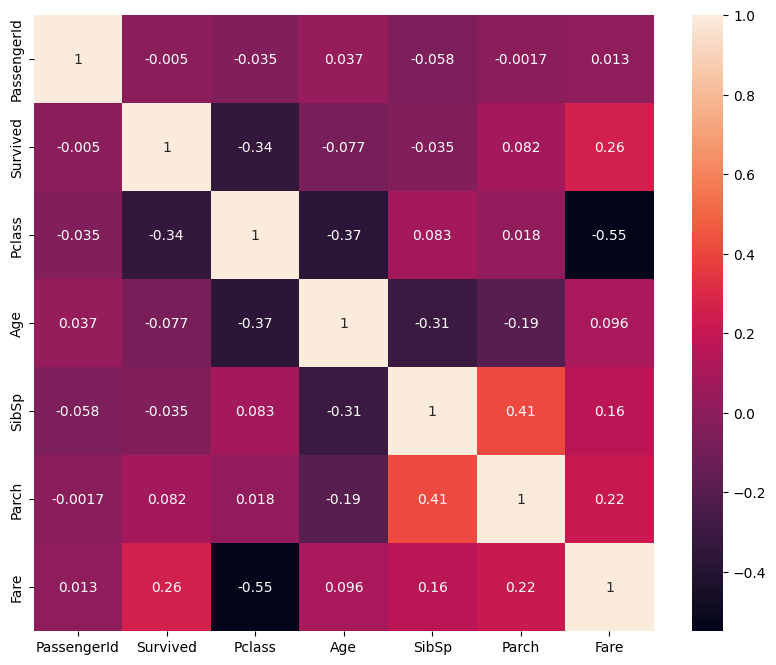

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## Modelling

In [7]:
print(df['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


In [8]:
df['Sex'] = df['Sex'].str.replace('female','0')
df['Sex'] = df['Sex'].str.replace('male','1')

In [9]:
print(df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: object


In [10]:
df['Sex'] = pd.to_numeric(df['Sex'])
df['Sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [11]:
print(df['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [12]:
df['Embarked'] = df['Embarked'].str.replace('S','0')
df['Embarked'] = df['Embarked'].str.replace('C','1')
df['Embarked'] = df['Embarked'].str.replace('Q','2')

In [13]:
print(df['Embarked'])

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: object


In [14]:
df['Embarked'] = pd.to_numeric(df['Embarked'])
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype  
--------------  -----  
889 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [17]:
features = ['Pclass','Sex','SibSp','Parch','Fare']
x = df[features]
y = df['Survived']
x.shape, y.shape

((891, 5), (891,))

In [18]:
print(x)

     Pclass  Sex  SibSp  Parch     Fare
0         3    1      1      0   7.2500
1         1    0      1      0  71.2833
2         3    0      0      0   7.9250
3         1    0      1      0  53.1000
4         3    1      0      0   8.0500
..      ...  ...    ...    ...      ...
886       2    1      0      0  13.0000
887       1    0      0      0  30.0000
888       3    0      1      2  23.4500
889       1    1      0      0  30.0000
890       3    1      0      0   7.7500

[891 rows x 5 columns]


In [19]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [21]:
print(x_train)

     Pclass  Sex  SibSp  Parch      Fare
847       3    1      0      0    7.8958
822       1    1      0      0    0.0000
27        1    1      3      2  263.0000
433       3    1      0      0    7.1250
300       3    0      0      0    7.7500
..      ...  ...    ...    ...       ...
627       1    0      0      0   77.9583
547       2    1      0      0   13.8625
829       1    0      0      0   80.0000
424       3    1      1      1   20.2125
742       1    0      2      2  262.3750

[712 rows x 5 columns]


In [22]:
df.dropna(subset = ['Age','Embarked'], inplace=True)

In [23]:
print(x_train)

     Pclass  Sex  SibSp  Parch      Fare
847       3    1      0      0    7.8958
822       1    1      0      0    0.0000
27        1    1      3      2  263.0000
433       3    1      0      0    7.1250
300       3    0      0      0    7.7500
..      ...  ...    ...    ...       ...
627       1    0      0      0   77.9583
547       2    1      0      0   13.8625
829       1    0      0      0   80.0000
424       3    1      1      1   20.2125
742       1    0      2      2  262.3750

[712 rows x 5 columns]


In [24]:
print(x.shape, x_train.shape, x_test.shape)

(891, 5) (712, 5) (179, 5)


In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)

In [26]:
lr = LogisticRegression()

In [27]:
df.fillna(0, inplace=True)

In [28]:
df = df.fillna(0)

In [29]:
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [31]:
df.fillna(0, inplace=True)

## Evaluasi Model

In [32]:
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [33]:
print('Akurasi data testing adalah: ',training_data_accuracy)

Akurasi data testing adalah:  0.797752808988764


In [34]:
input_data = (3,1,1,0,7.2500)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)


pred = lr.predict(input_data_reshape)
print(pred)

if(pred[0] == 0):
    print('Penumpamg tidak selamat')
else :
    print('Penumpang selamat')

[0]
Penumpamg tidak selamat


In [35]:
input_data = (1,0,1,0,71.2833)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)


pred = lr.predict(input_data_reshape)
print(pred)

if(pred[0] == 0):
    print('Penumpang tidak selamat')
else :
    print('Penumpang selamat')

[1]
Penumpang selamat


## Deployment

## Simpan Model

In [36]:
import pickle

In [37]:
filename = 'prediksi_keselamatan_1.sav'
pickle.dump(lr, open(filename, 'wb'))